---
# Cairo University Faculty of Engineering
## Machine Learning
## Assignment 2

---

Please write your full name here
- **Name** : Mohamed El-Sayed Eid

## Part 1 Simulated Data

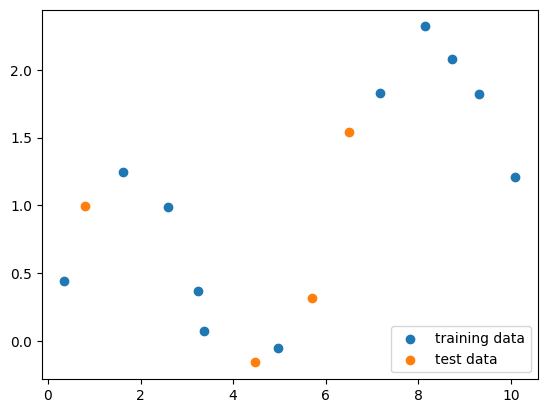

In [ ]:
%matplotlib notebook
%matplotlib inline

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split


np.random.seed(0)
n = 15
x = np.linspace(0,10,n) + np.random.randn(n)/5
y = np.sin(x)+x/6 + np.random.randn(n)/10


X_train, X_test, y_train, y_test = train_test_split(x.reshape(-1,1), y, random_state=0)
# print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

plt.figure()
plt.scatter(X_train, y_train, label='training data')
plt.scatter(X_test, y_test, label='test data')
plt.legend(loc=4);

### Question 1.1
- Write a function that fits a polynomial LinearRegression model on the training data X_train for degrees **1, 2, 3, 6, and 9**. (Use `PolynomialFeatures` in `sklearn.preprocessing` to create the polynomial features and then fit a linear regression model)
- For each model, find 100 predicted values over the interval x = 0 to 10 (e.g. np.linspace(0,10,100)) and store this in a numpy array.
- The first row of this array should correspond to the output from the model trained on degree 1, the second row degree 2, the third row degree 3, the fourth row degree 6, and the fifth row degree 9.

In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
def answer_one():
    """
    Perform polynomial regression for different degrees and return the result.

    Returns:
    result (numpy.ndarray): The result of polynomial regression for different degrees.
    """

    # Define the degrees for polynomial regression
    degrees = [1, 2, 3, 6, 9]

    # Initialize the result array with zeros
    result = np.zeros((len(degrees), 100))

    # Perform polynomial regression for each degree
    for i, degree in enumerate(degrees):
        # Create polynomial features object with the current degree
        poly = PolynomialFeatures(degree=degree)

        X_poly = poly.fit_transform(X_train)

        # Print the shapes of the original and transformed training data
        # print(f"at degree {degree}, shape of X_train: {X_train.shape}, shape of X_poly: {X_poly.shape}")

        linearModel = LinearRegression().fit(X_poly, y_train)

        # Generate x values for predictions
        x_values = np.linspace(0, 10, 100).reshape(-1, 1)

        # Transform the x values to include polynomial features
        X_values_poly = poly.transform(x_values)

        # Store the predictions for the current degree in the result array
        result[i, :] = linearModel.predict(X_values_poly)

    return result

In [ ]:
results = answer_one()
print(results.shape)

(5, 100)


In [ ]:
print(results)

[[ 2.53040195e-01  2.69201547e-01  2.85362899e-01  3.01524251e-01
   3.17685603e-01  3.33846955e-01  3.50008306e-01  3.66169658e-01
   3.82331010e-01  3.98492362e-01  4.14653714e-01  4.30815066e-01
   4.46976417e-01  4.63137769e-01  4.79299121e-01  4.95460473e-01
   5.11621825e-01  5.27783177e-01  5.43944529e-01  5.60105880e-01
   5.76267232e-01  5.92428584e-01  6.08589936e-01  6.24751288e-01
   6.40912640e-01  6.57073992e-01  6.73235343e-01  6.89396695e-01
   7.05558047e-01  7.21719399e-01  7.37880751e-01  7.54042103e-01
   7.70203454e-01  7.86364806e-01  8.02526158e-01  8.18687510e-01
   8.34848862e-01  8.51010214e-01  8.67171566e-01  8.83332917e-01
   8.99494269e-01  9.15655621e-01  9.31816973e-01  9.47978325e-01
   9.64139677e-01  9.80301028e-01  9.96462380e-01  1.01262373e+00
   1.02878508e+00  1.04494644e+00  1.06110779e+00  1.07726914e+00
   1.09343049e+00  1.10959184e+00  1.12575320e+00  1.14191455e+00
   1.15807590e+00  1.17423725e+00  1.19039860e+00  1.20655995e+00
   1.22272

### Fitted model plot

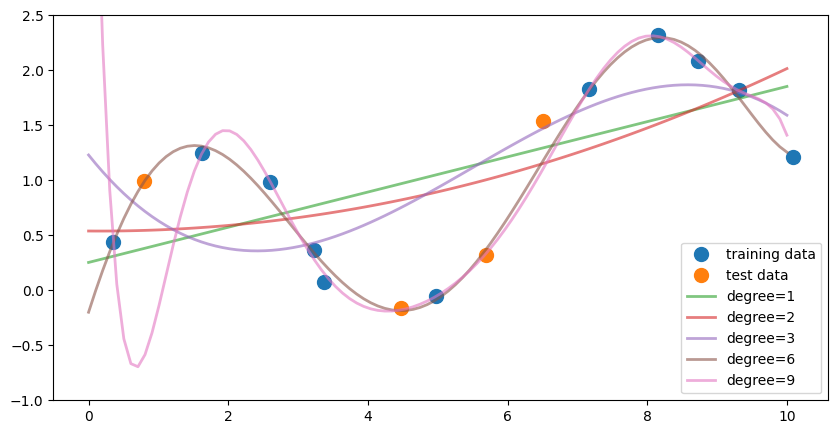

In [ ]:
def plot_one(degree_predictions):
    import matplotlib.pyplot as plt
    plt.figure(figsize=(10,5))
    plt.plot(X_train, y_train, 'o', label='training data', markersize=10)
    plt.plot(X_test, y_test, 'o', label='test data', markersize=10)
    for i,degree in enumerate([1,2,3,6,9]):
        plt.plot(np.linspace(0,10,100), degree_predictions[i], alpha=0.6, lw=2, label='degree={}'.format(degree))
    plt.ylim(-1,2.5)
    plt.legend(loc=4)

plot_one(answer_one())

### Question 1.2
Comment on the figure above in 2 lines in terms of fitting the data.

**ANSWER**

while using $\text{PolynomialFeatures}$ may be useful for the model to introduce additional features, on the other hand increasing the number of degrees causes the model to overfit and therefore the model will not generalize well on seeing unseen data.

### Question 2
- Write a function that fits a polynomial `LinearRegression` model on the training data `X_train` for degrees 0 through 9. For each model compute the $R^2$ regression score on the **training data** as well as the the **test data**, and return both of these arrays in a tuple.

- *This function should return one tuple of numpy arrays `(r2_train, r2_test)`. Both arrays should have shape `(10,)`*

In [ ]:
def answer_two():
    """
    Fits polynomial regression models of varying degrees to the training data and calculates the R2 scores for both training and test sets.

    Returns:
    (r2_train, r2_test): tuple of arrays containing the R2 scores for the training and test sets, respectively.
    """
    from sklearn.linear_model import LinearRegression
    from sklearn.preprocessing import PolynomialFeatures
    from sklearn.metrics import r2_score

    # Define the degrees of polynomial features to be considered
    degrees = np.arange(10)
    r2_train, r2_test = np.zeros(10), np.zeros(10)

    # Iterate over each degree and fit a polynomial regression model
    for i, degree in enumerate(degrees):
        poly = PolynomialFeatures(degree=degree)
        X_poly = poly.fit_transform(X_train)  # Transform the training data to polynomial features
        linearModel = LinearRegression().fit(X_poly, y_train)  # Fit the linear regression model
        r2_train[i] = r2_score(y_train, linearModel.predict(X_poly))  # Calculate R2 score for training set
        r2_test[i] = r2_score(y_test, linearModel.predict(poly.transform(X_test)))  # Calculate R2 score for test set

    return (r2_train, r2_test)

In [ ]:
results = answer_two()
print(results[0].shape,results[1].shape)

(10,) (10,)


In [ ]:
print(results)

(array([0.        , 0.42924578, 0.4510998 , 0.58719954, 0.91941945,
       0.97578641, 0.99018233, 0.99352509, 0.99637545, 0.99803706]), array([-0.47808642, -0.45237104, -0.06856984,  0.00533105,  0.73004943,
        0.87708301,  0.9214094 ,  0.92021504,  0.63247948, -0.64525365]))


### Question 3
- Plot $R^2$ scores at degrees from 0 to 9 for both training and testing data on the same plot.

- The plot must contain a legend and appropriate names for the axes.

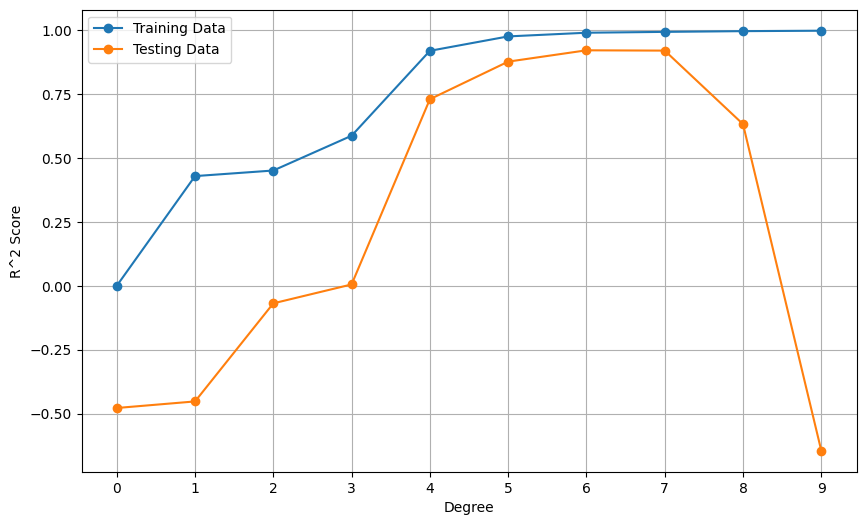

In [ ]:
def plot_r2_scores(degrees, r2_train, r2_test):
    """
    Plot R^2 scores for polynomial regression.

    Parameters:
    degrees (array-like): The degrees of the polynomial regression.
    r2_train (array-like): The R^2 scores for the training data.
    r2_test (array-like): The R^2 scores for the testing data.
    """
    plt.figure(figsize=(10, 6))
    plt.plot(degrees, r2_train, marker='o', label='Training Data')
    plt.plot(degrees, r2_test, marker='o', label='Testing Data')
    plt.xlabel('Degree')
    plt.ylabel('R^2 Score')
    plt.xticks(degrees)
    plt.legend()
    plt.grid(True)
    plt.show()

degrees = np.arange(10)
r2_train, r2_test = answer_two()
plot_r2_scores(degrees, r2_train, r2_test)

Based on the $R^2$ scores (degree levels 0 through 9), what degree level corresponds to a model that is **underfitting**? What degree level corresponds to a model that is **overfitting**? What choice of degree level would provide a model with **good generalization** performance on this dataset?

**ANSWER**

$\text{Underfitting}$: Degree 3, This is indicated by the low $R^2$ score for both the training and test data.

$\text{Overfitting}$: Degree 9, This is indicated by the high $R^2$ score on training data but low $R^2$ score on the test data.

$\text{good generalization}$: Degrees 6 & 7, This is indicated by achieving a high $R^2$ score on the training data while still getting a relatively high score on the test data.

### Question 4

- Training models on high degree polynomial features can result in overly complex models that overfit, so we often use regularized versions of the model to constrain model complexity, as we saw with Ridge and Lasso linear regression.

- For this question, train three models: a non-regularized LinearRegression model (default parameters) and a regularized Lasso Regression model (with parameters `alpha=0.01`, `max_iter=10000`), and a regularized Ridge Regression model (with parameters `alpha=0.01`, `max_iter=10000`) both on polynomial features of degree 50.
- Return the $R^2$ score for both the LinearRegression, Lasso, Ridge model's test sets.


*This function should return one tuple `(LinearRegression_R2_test_score, Lasso_R2_test_score, Ridge_R2_test_score)`*

In [ ]:
def answer_four():
    """
    This function fits polynomial regression models with different regularization methods and returns their R-squared scores.
    """
    # Import necessary libraries
    from sklearn.preprocessing import PolynomialFeatures
    from sklearn.linear_model import Lasso, LinearRegression, Ridge
    from sklearn.metrics import r2_score

    # Set the degree of the polynomial
    DEGREE = 50

    # Generate polynomial features
    poly = PolynomialFeatures(degree=DEGREE)
    X_poly_train = poly.fit_transform(X_train)
    X_poly_test = poly.transform(X_test)

    # Fit each model to the training data
    linearModel = LinearRegression().fit(X_poly_train, y_train)
    lassoModel = Lasso(alpha=0.01, max_iter=10000).fit(X_poly_train, y_train)
    ridgeModel = Ridge(alpha=0.01, max_iter=10000).fit(X_poly_train, y_train)

    # Calculate R-squared scores for each model
    r2_linear = r2_score(y_test, linearModel.predict(X_poly_test))
    r2_lasso = r2_score(y_test, lassoModel.predict(X_poly_test))
    r2_ridge = r2_score(y_test, ridgeModel.predict(X_poly_test))

    # Return the R-squared scores for linear, lasso, and ridge models
    return (r2_linear, r2_lasso, r2_ridge)


In [ ]:
results = answer_four()
print(results)

(0.006953559711665225, 0.8493908995296351, -0.08938086200465722)


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 3.140e-01, tolerance: 6.895e-04
  model = cd_fast.enet_coordinate_descent(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_ridge.py:255: UserWarning: Singular matrix in solving dual problem. Using least-squares solution instead.
  warnings.warn(


**Comment on the results**
- which is better?
- what's the difference between the models in results and data fit?
- how do the weight values differ between the models?

**ANSWER**

* The highest $R^2$ score is 0.8494 which is for the lasso model, indicating that it is better than other models
* **Linear Regression**: has a very low $R^2$ score (close to zero), indicating poor performance. **Lasso Regression**: has the highest $R^2$ score, suggesting better fit the data. **Ridge Regression**: has a negative $R^2$ score indicates that the model's predicted values perform worse than using the average as a predicted value.
* **Lasso Regression** tends to drive some coefficients to zero. **Ridge Regression** tends to shrink the coefficients towards zero without setting them to zero. **Linear Regression** without any regularization, may have large coefficients for some features.

### Question 5
Write a function to calculate the total mean square error.
$$
MSE = E[ (y_{true}  - y_{hat})^2 ]
$$

**Then compare your results with scikit-learn implementation of mean square error on the example provided below:**

In [ ]:
y_true = [3, -0.5, 2, 7]
y_pred = [2.5, 0.0, 2, 8]

In [ ]:
def mse(y_true, y_pred):
    """
    Calculate the mean squared error between the true values and the predicted values.

    Args:
    y_true (array-like): The true values.
    y_pred (array-like): The predicted values.

    Returns:
    float: The mean squared error.
    """
    y_true = np.array(y_true)
    y_pred = np.array(y_pred)

    error = np.mean(np.square(y_true - y_pred))
    return error

In [ ]:
# comparison code
from sklearn.metrics import mean_squared_error

print("Implemented MSE:",mse(y_true, y_pred))
print("MSE from sklearn:",mean_squared_error(y_true, y_pred))

Implemented MSE: 0.375
MSE from sklearn: 0.375


### Question 6
Implement a linear regression class **FROM SCRATCH** that can be used by one of the following three options (according to user's choice):
1. Ordinary Linear Regression Class
2. Implement Ridge Regression Class
3. Implement Lasso Regression Class

- Can use numpy
- Complete the missing code

**Help**

The gradient descent algorithm is:

$$\begin{align*}& \text{repeat until convergence:} \; \lbrace \newline \; & \phantom {0000} b := b -  \alpha \frac{\partial J(w,b)}{\partial b} \newline       \; & \phantom {0000} w_k := w_k -  \alpha \frac{\partial J(w,b)}{\partial w_k} \tag{1}  \; &
\newline & \rbrace\end{align*}$$

where, parameters $w, b$ are both updated simultaniously and where for **LINEAR REGRESSION**
$$
\frac{\partial J(w,b)}{\partial b}  = \frac{1}{n} \sum\limits_{i = 0}^{n-1} (f_{w,b}(x^{(i)}) - y^{(i)}) \tag{2}
$$
$$
\frac{\partial J(w,b)}{\partial w_k}  = \frac{1}{n} \sum\limits_{i = 0}^{n-1} (f_{w,b}(x^{(i)}) -y^{(i)})x^{(i)}_k \tag{3}
$$
    
*  $f_{w,b}(x^{(i)})$ is the model's prediction, while $y^{(i)}$, is the target value


You will implement a function called `update_weights` which calculates $\frac{\partial J(w)}{\partial w_k}$, $\frac{\partial J(w)}{\partial b}$ for each type of regression --> different gradients for each type


For example for **Linear Regression**, the `updat_weights` function should:

* Iterate over the training examples, and for each example, compute:
    * The prediction of the model for that example
    $$
    f_{wb}(x^{(i)}) =  \sum_{k=1}^{k=m}w_kx^{(i)} + b
    $$
   
    * Loop over features $k$ and calculate the gradient for each parameter $w_k$
        $$
        \frac{\partial J(w,b)}{\partial w_k}^{(i)}  =  (f_{w,b}(x^{(i)}) -y^{(i)})x^{(i)}_k
        $$
    * Then for $b$ from that example
        $$
        \frac{\partial J(w,b)}{\partial b}^{(i)}  =  (f_{w,b}(x^{(i)}) - y^{(i)})
        $$

* Calculate the total gradient update from all the examples for each parameter $w_k$ and $b$
    $$
    \frac{\partial J(w,b)}{\partial b}  = \frac{1}{n} \sum\limits_{i = 0}^{n-1} \frac{\partial J(w,b)}{\partial b}^{(i)}
    $$
    
    $$
    \frac{\partial J(w,b)}{\partial w_k}  = \frac{1}{n} \sum\limits_{i = 0}^{n-1} \frac{\partial J(w,b)}{\partial w_k}^{(i)}
    $$
  * Here, $n$ is the number of training examples and $\sum$ is the summation operator

* Then update weights

In [ ]:
import numpy as np

# Linear Regression

class LinearRegression() :

    def __init__( self, learning_rate, iterations, type="linear" , reg_parameter = 0) :
        """
        This function initializes the object instance with arguments learning_rate, number of iterations, and whether to use linear or ridge or lasso
        reg_paramter is lambda for regularized regression"""

        self.learning_rate = learning_rate

        self.iterations = iterations

        self.type = type

        self.lam = reg_parameter

    def fit( self, X, Y ) :
        self.m, self.n = X.shape

        # weight initialization, initialize w to random numbers from a uniform distribution over [0,1(
        self.W = np.random.uniform(size=self.n)

        # intialize b to 0
        self.b = 0

        self.X = X

        self.Y = Y

        # gradient descent learning
        for _ in range( self.iterations ) :
            self.update_weights()

        return self

    def update_weights( self ) :

        Y_pred = self.predict( self.X )
        dZ = Y_pred - self.Y

        # calculate gradients
        if self.type == 'linear':
            dW = (1/self.m) * np.dot(self.X.T, dZ )

        elif self.type == 'ridge':
            dW = (1/self.m) * (np.dot(self.X.T, dZ) + 2 * self.lam * self.W)

        else:
            dW = (1/self.m) * (np.dot(self.X.T, dZ) + self.lam * np.sign(self.W))

        db = (1/self.m) * np.sum(dZ)

        # update weights
        self.W -= self.learning_rate * dW

        self.b -= self.learning_rate * db

        # you don't need to return w and b
        return self

    def predict( self, X ) :
        return np.dot(X, self.W) + self.b

- **Train your 3 models on the simulated train data provided at the beginning of the assignment**
- use alpha = 0.01, learning_rate = 0.01, iterations, 500

In [ ]:
# Your code here
# Initialize models
linear_model = LinearRegression(learning_rate=0.01, iterations=500)
ridge_model = LinearRegression(learning_rate=0.01, iterations=500, reg_parameter=0.01, type="ridge")
lasso_model = LinearRegression(learning_rate=0.01, iterations=500, reg_parameter=0.01, type="lasso")

# Fit models
linear_model.fit(X_train, y_train)
ridge_model.fit(X_train, y_train)
lasso_model.fit(X_train, y_train)

- **Test your 3 models on the simulated test data provided at the beginning of the assignment**
- **Print the MSE for each model**

In [ ]:
# Predictions
y_pred_linear = linear_model.predict(X_test)
y_pred_ridge = ridge_model.predict(X_test)
y_pred_lasso = lasso_model.predict(X_test)

# Calculate MSE
mse_linear = mse(y_test, y_pred_linear)
mse_ridge = mse(y_test, y_pred_ridge)
mse_lasso = mse(y_test, y_pred_lasso)

# Print MSE for each model
print("MSE for Linear Regression:", mse_linear)
print("MSE for Ridge Regression:", mse_ridge)
print("MSE for Lasso Regression:", mse_lasso)

MSE for Linear Regression: 0.6070326957024281
MSE for Ridge Regression: 0.6066927296418111
MSE for Lasso Regression: 0.6067295145111583


---
# Part 2 - Diabetes Data

For this assignment, you will be using the [Diabetes](https://scikit-learn.org/stable/datasets/toy_dataset.html#diabetes-dataset) dataset to create a regression model that can help diagnose patients' disease progression one year after baseline.


## Question 1 (1 point)

Load Diabetes Dataset from [scikit-learn](https://scikit-learn.org/stable/modules/generated/sklearn.datasets.load_diabetes.html#sklearn-datasets-load-diabetes)

The following function MUST:
1. Load diabetes dataset from scikit-learn as a scikit-learn bunch object which is similar to a dictionary
    - Use `scaled= False`
2. Convert the diabetes data to a pandas dataframe
3. Return a pandas dataframe with:
    - **CORRECT COLUMN NAMES** --> meaningful !!! i.e. NOT s1, s2, s3, ...
    - target column should be named "target"

In [ ]:
import pandas as pd
from sklearn.datasets import load_diabetes

def load_data():
    """
    Return a pandas dataframe
    """

    # Load diabetes dataset
    diabetes_data = load_diabetes(scaled=False)
    X_data = pd.DataFrame(diabetes_data.data, columns=diabetes_data.feature_names)
    y_data = pd.DataFrame(diabetes_data.target, columns=["target"])
    df = pd.concat([X_data, y_data], axis=1)

    # Rename columns
    df = df.rename(columns={'s1': 'TC',
                            's2': 'LDL',
                            's3': 'HDL',
                            's4': 'TCH',
                            's5': 'LTG',
                            's6': 'GLU'})

    return df

In [ ]:
diabetes_data = load_diabetes(scaled=False)
# diabetes_data.keys()
print(diabetes_data.DESCR)

.. _diabetes_dataset:

Diabetes dataset
----------------

Ten baseline variables, age, sex, body mass index, average blood
pressure, and six blood serum measurements were obtained for each of n =
442 diabetes patients, as well as the response of interest, a
quantitative measure of disease progression one year after baseline.

**Data Set Characteristics:**

  :Number of Instances: 442

  :Number of Attributes: First 10 columns are numeric predictive values

  :Target: Column 11 is a quantitative measure of disease progression one year after baseline

  :Attribute Information:
      - age     age in years
      - sex
      - bmi     body mass index
      - bp      average blood pressure
      - s1      tc, total serum cholesterol
      - s2      ldl, low-density lipoproteins
      - s3      hdl, high-density lipoproteins
      - s4      tch, total cholesterol / HDL
      - s5      ltg, possibly log of serum triglycerides level
      - s6      glu, blood sugar level

Note: Each of these 1

In [ ]:
df = load_data()
df.head()

,age,sex,bmi,bp,TC,LDL,HDL,TCH,LTG,GLU,target
0,59.0,2.0,32.1,101.0,157.0,93.2,38.0,4.0,4.8598,87.0,151.0
1,48.0,1.0,21.6,87.0,183.0,103.2,70.0,3.0,3.8918,69.0,75.0
2,72.0,2.0,30.5,93.0,156.0,93.6,41.0,4.0,4.6728,85.0,141.0
3,24.0,1.0,25.3,84.0,198.0,131.4,40.0,5.0,4.8903,89.0,206.0
4,50.0,1.0,23.0,101.0,192.0,125.4,52.0,4.0,4.2905,80.0,135.0


## Question 2

### 2.1

Print a data description of all columns of dataframe

use `.describe()`

In [ ]:
def range_columns(df):
    """
    Function should return the drscription of dataframe
    """
    ### BEGIN SOLUTION
    display(df.describe())
    ### END SOLUTION

In [ ]:
range_columns(df)

,age,sex,bmi,bp,TC,LDL,HDL,TCH,LTG,GLU,target
count,442.000000,442.000000,442.000000,442.000000,442.000000,442.000000,442.000000,442.000000,442.000000,442.000000,442.000000
mean,48.518100,1.468326,26.375792,94.647014,189.140271,115.439140,49.788462,4.070249,4.641411,91.260181,152.133484
std,13.109028,0.499561,4.418122,13.831283,34.608052,30.413081,12.934202,1.290450,0.522391,11.496335,77.093005
min,19.000000,1.000000,18.000000,62.000000,97.000000,41.600000,22.000000,2.000000,3.258100,58.000000,25.000000
25%,38.250000,1.000000,23.200000,84.000000,164.250000,96.050000,40.250000,3.000000,4.276700,83.250000,87.000000
50%,50.000000,1.000000,25.700000,93.000000,186.000000,113.000000,48.000000,4.000000,4.620050,91.000000,140.500000
75%,59.000000,2.000000,29.275000,105.000000,209.750000,134.500000,57.750000,5.000000,4.997200,98.000000,211.500000
max,79.000000,2.000000,42.200000,133.000000,301.000000,242.400000,99.000000,9.090000,6.107000,124.000000,346.000000


### 2.2

Remove all categorical features from dataframe. Function should return the new dataframe.

In [ ]:
def drop_categorical(df):
    """
    Function should return the dataframe with categorical features removed
    """
    ### BEGIN SOLUTION
    df = df.select_dtypes("number")
    return df
    ### END SOLUTION

In [ ]:
df = drop_categorical(df)

In [ ]:
df.head()

,age,sex,bmi,bp,TC,LDL,HDL,TCH,LTG,GLU,target
0,59.0,2.0,32.1,101.0,157.0,93.2,38.0,4.0,4.8598,87.0,151.0
1,48.0,1.0,21.6,87.0,183.0,103.2,70.0,3.0,3.8918,69.0,75.0
2,72.0,2.0,30.5,93.0,156.0,93.6,41.0,4.0,4.6728,85.0,141.0
3,24.0,1.0,25.3,84.0,198.0,131.4,40.0,5.0,4.8903,89.0,206.0
4,50.0,1.0,23.0,101.0,192.0,125.4,52.0,4.0,4.2905,80.0,135.0


## Question 3

Using `train_test_split`, split `X` and `y` into training and test sets. With 80% training and 10% test.

USE `random_state=0`

In [ ]:
def split(df):
    """
    Function should return X_train, X_test, y_train, y_test
    """
    ### BEGIN SOLUTION
    from sklearn.model_selection import train_test_split

    X = df.drop("target", axis=1)
    y = df["target"]
    X_train, X_test, y_train, y_test  = train_test_split(X, y, test_size=0.1, train_size=0.8, random_state=0)
    return X_train, X_test, y_train, y_test

    ### END SOLUTION

In [ ]:
X_train, X_test, y_train, y_test = split(df)

print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

(353, 10) (45, 10) (353,) (45,)


## Question 5

Use scikit-learn standard scaler to standardize training data into 0 mean and 1 std.

Function must return the normalized data and the standard scaler object

In [ ]:
def standardize(data):
    """Standardize a data to 0 mean and 1 std
    Return standardized data AND the scaler object
    """
    ### BEGIN SOLUTION
    from sklearn.preprocessing import StandardScaler

    scaler = StandardScaler()
    new_data = scaler.fit_transform(data)
    return new_data, scaler
    ### END SOLUTION

In [ ]:
scaled_X_train, x_scaler = standardize(X_train)
# np.mean(scaled_X_train), np.std(scaled_X_train)

- Apply the same transformation to the test data

In [ ]:
scaled_X_test, _ = standardize(X_test)
scaled_y_test, _ = standardize(np.array(y_test).reshape(-1,1))

## Question 6

Create a scikit-learn regression model and train it on diabetes data.
Your function should return the trained model

In [ ]:
def regression_sc(X, y):
    """Trains a linear regression model on X, y data """
    ### BEGIN SOLUTION
    from sklearn.linear_model import LinearRegression

    model = LinearRegression()
    model.fit(X, y)
    return model

    ### END SOLUTION

In [ ]:
linreg = regression_sc(scaled_X_train, y_train)
y_pred = linreg.predict(scaled_X_train)

print('linear model coeff (w): {}'.format(linreg.coef_))
print('linear model intercept (b): {:.3f}'.format(linreg.intercept_))

linear model coeff (w): [ -1.7829557  -10.95910104  25.95303408  16.57677682 -39.1934759
  24.41652318   6.66734605   8.44241843  33.82897861   4.80107039]
linear model intercept (b): 150.246


- Print the mse, and R2 score for the train data

In [ ]:
from sklearn.metrics import r2_score
print("Mean squared error (MSE) for training: %.2f" % mean_squared_error(y_train, y_pred))
print("(R^2) score for training: %.2f" % r2_score(y_train, y_pred))

Mean squared error (MSE) for training: 2812.20
(R^2) score for training: 0.53


- Print the mse, and R2 score for the test data

In [ ]:
print("Mean squared error (MSE) for test: %.2f" % mean_squared_error(y_test, linreg.predict(scaled_X_test)))
print("(R^2) score for test: %.2f" % r2_score(y_test, linreg.predict(scaled_X_test)))

Mean squared error (MSE) for test: 3400.31
(R^2) score for test: 0.30


- Comment on the results in terms of data fit

* The higher MSE of $3400.31$ on the test data compared to the training data MSE of $2812.20$ may indicate that the model might be overfitting slightly when applied to unseen data.
* The $R^2$ score of $0.30$ suggests that the model's performance decreases when applied to new, unseen data compared to the training data.